* This notebook contains the analysis of Charities data taken from the UK Charity commission website.
* Our goal is to create a network of overlapping board members that sit on more than one board 
* The Charity Commission for England and Wales provides a daily extract of publicly available data in both JSON and tab delimited formats for download. 
* For the purpose of this analysis, the required data files have been downloaded from the website and uploaded to google drive to ensure accesibility. In order to run the notebook and perform analysis on the data it is suggested that required data files be uploaded to your personal drive so that they can be accessed easily.
* Note that the terms 'Trustee' and 'Board Member' and the terms 'Charity' and 'Organization' have been used interchangeably throughout this notebook but they mean the same thing.
* Dataset Link - https://register-of-charities.charitycommission.gov.uk/register/full-register-download

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!ls /content/drive/"My Drive/UK_Data"

 Classification  'Example Response'   Grants   npoclass_model_bc
 Dataset	  file1.csv	      json     text


In [3]:
import json
import pandas as pd

In [4]:
# reading data from the json file from drive
# The publicextract.charity_trustee.json file contains the data about all the trustees across different charities in the UK
# Since all the trustees have a unique id therefore we do not need to worry about name disambiguation
# For more information about individual attributes, refer to the Data Definition file provided with the dataset
with open('drive/My Drive/UK_Data/json/publicextract.charity_trustee.json', encoding="utf-8-sig") as f:
  data = json.load(f)

json_formatted_str = json.dumps(data[0], indent=4)
print(len(data)) # Please note that this is not the actual number of trustees, since a single trustee can be part of multiple charities/orgainizations
print(json_formatted_str)
# print(data[1000])

942096
{
    "date_of_extract": "2022-01-11T00:00:00",
    "organisation_number": 521013,
    "registered_charity_number": 521013,
    "linked_charity_number": 0,
    "trustee_id": 23760,
    "trustee_name": "AUGHTON PARISH COUNCIL",
    "trustee_is_chair": false,
    "individual_or_organisation": "O",
    "trustee_date_of_appointment": null
}


In [5]:
# Below chunk of code creates 2 separates dictionaries. One stores the data for all the board members and the second stores the data of all the charities.
# This is done in order to make further analysis easier.

# The 'members' dictionary will contain unique "trustee_id" as the key and a list of data containing the organisation the trustee sits on as values
# The 'orgs' dictionary will contain unique "organisation_number" as the key and the rest of the data containing the trustee id as values inside a list
members = {}
orgs = {}

# iterate over individual trustees in different organisations and store the data into the dictionaries
for trustee in data:
    tid = trustee['trustee_id']
    oid = trustee['organisation_number']
    if(tid not in members):
        members[tid] = [trustee]
    else:
        members[tid].append(trustee)
    if(oid not in orgs):
        orgs[oid] = [trustee]
    else:
        orgs[oid].append(trustee)

# Length of members will give the total number of unique trustees in UK Charities
print("Total Trustees : ",len(members))
# Length of orgs will give the total number of unique charities in the UK (does not account for the charities that are not included in the dataset)
print("Total Organizations: ",len(orgs))

Total Trustees :  851555
Total Organizations:  170190


In [6]:
# Let's visualize what a key-value pair inside the members dict looks like
list(members.items())[2]
# a single object inside the dictionary contains the id of the trustee and the list of ids of all the charities of which the trustee is a board member

(2020489,
 [{'date_of_extract': '2022-01-11T00:00:00',
   'individual_or_organisation': 'O',
   'linked_charity_number': 0,
   'organisation_number': 221950,
   'registered_charity_number': 221950,
   'trustee_date_of_appointment': None,
   'trustee_id': 2020489,
   'trustee_is_chair': False,
   'trustee_name': 'HYNDBURN BOROUGH COUNCIL'},
  {'date_of_extract': '2022-01-11T00:00:00',
   'individual_or_organisation': 'O',
   'linked_charity_number': 0,
   'organisation_number': 511931,
   'registered_charity_number': 511931,
   'trustee_date_of_appointment': None,
   'trustee_id': 2020489,
   'trustee_is_chair': False,
   'trustee_name': 'HYNDBURN BOROUGH COUNCIL'},
  {'date_of_extract': '2022-01-11T00:00:00',
   'individual_or_organisation': 'O',
   'linked_charity_number': 0,
   'organisation_number': 519423,
   'registered_charity_number': 519423,
   'trustee_date_of_appointment': None,
   'trustee_id': 2020489,
   'trustee_is_chair': False,
   'trustee_name': 'HYNDBURN BOROUGH COUNC

In [7]:
# Visualizing key-value pair
list(orgs.items())[10]
# Interpretation => the organisation - 524029 has 2 different trustees - 2201310(CARMARTHENSHIRE COUNTY COUNCIL) and 2343630(CARMARTHENSHIRE C C)

(524029,
 [{'date_of_extract': '2022-01-11T00:00:00',
   'individual_or_organisation': 'O',
   'linked_charity_number': 0,
   'organisation_number': 524029,
   'registered_charity_number': 524029,
   'trustee_date_of_appointment': None,
   'trustee_id': 2201310,
   'trustee_is_chair': False,
   'trustee_name': 'CARMARTHENSHIRE COUNTY COUNCIL'},
  {'date_of_extract': '2022-01-11T00:00:00',
   'individual_or_organisation': 'O',
   'linked_charity_number': 0,
   'organisation_number': 524029,
   'registered_charity_number': 524029,
   'trustee_date_of_appointment': None,
   'trustee_id': 2343630,
   'trustee_is_chair': False,
   'trustee_name': 'CARMARTHENSHIRE C C'}])

In [8]:
# Visualize the no. of boards each person sits on

# dictionary 'd' will have the following structure : {n : n_trustees} where n is the number of boards and 
# n_trustees is number of trustees sitting on n number of boards
d = {}

# List x will contain the unique trustee ids of all the trustees
x = []

# List y will contain the number of boards each trustee sits on i.e. y[i] is the number of boards x[i] sits on
y = []

# the length of the list corresponding to each key in the members dictionary denotes the number of boards each trustee sits on
for i in members.keys():
    x.append(i)
    y.append(len(members[i]))
    if(len(members[i]) not in d):
        d[len(members[i])] = 1
    else:
        d[len(members[i])]+= 1

# Printing out lengths to ensure no data has been lost
print(len(x))
print(len(y))
print(len(d))
print(sum(d.values())) # sum of the values should be equal to the total number of trustees

851555
851555
31
851555


In [9]:
# Sorting the data
d1 = {}
for k in sorted(d):
    d1[k] = d[k]
d1
#{no. of boards : no. of trustees}

{1: 783598,
 2: 54169,
 3: 9336,
 4: 2683,
 5: 913,
 6: 379,
 7: 187,
 8: 112,
 9: 56,
 10: 37,
 11: 28,
 12: 13,
 13: 7,
 14: 8,
 15: 4,
 16: 3,
 17: 5,
 19: 2,
 20: 2,
 21: 2,
 22: 1,
 23: 1,
 26: 1,
 27: 1,
 28: 1,
 31: 1,
 34: 1,
 40: 1,
 49: 1,
 81: 1,
 161: 1}

From the above data it can be seen that there are a few individuals/organisation that sit on more than 21 boards and it seems unreal.

In [10]:
#check if trustee sitting on more than 21 boards is an individual? or is it an organization?
for i in members:
    if(len(members[i])>21):
      # print out the id and the name of the trustee
        print(members[i][0]['trustee_id'],members[i][0]['trustee_name'], len(members[i]))
        

2514334 RHONDDA CYNON TAF CBC 34
507303 HSBC TRUST COMPANY (UK) LIMITED 40
1549908 THE COUNCIL OF THE BOROUGH OF KIRKLEES 23
1283098 LIVERPOOL CHARITY AND VOLUNTARY SERVICES 81
2270883 The Right Reverend Paul Hendricks 22
391697 MR M D PAISNER 31
12007865 Zedra Trust Company (UK) Limited 28
12337876 The Most Reverend John Wilson 27
12272703 Jennifer Andrews 26
12544636 Ludlow Trust Company Ltd 161
12556082 Ludlow Trust Company Ltd 49



Most of the trustees above are organisations which makes sense.

In [11]:
#reading the charities data
# publicextract.charity.json contains data about individual charities
with open('drive/My Drive/UK_Data/json/publicextract.charity.json', encoding="utf-8-sig") as f:
  charity_data = json.load(f)

print(len(charity_data)) # this number differs from the number of charities we saw above from the trustee data, it is because a lot of charities have their status as remove
print(json.dumps(charity_data[0],indent=4))
# print(charity_data[1000])

376413
{
    "date_of_extract": "2022-01-11T00:00:00",
    "organisation_number": 1,
    "registered_charity_number": 200027,
    "linked_charity_number": 1,
    "charity_name": "POTTERNE MISSION ROOM AND TRUST",
    "charity_type": null,
    "charity_registration_status": "Removed",
    "date_of_registration": "1962-05-17T00:00:00",
    "date_of_removal": "2014-04-16T00:00:00",
    "charity_reporting_status": null,
    "latest_acc_fin_period_start_date": null,
    "latest_acc_fin_period_end_date": null,
    "latest_income": null,
    "latest_expenditure": null,
    "charity_contact_address1": null,
    "charity_contact_address2": null,
    "charity_contact_address3": null,
    "charity_contact_address4": null,
    "charity_contact_address5": null,
    "charity_contact_postcode": null,
    "charity_contact_phone": null,
    "charity_contact_email": null,
    "charity_contact_web": null,
    "charity_company_registration_number": null,
    "charity_insolvent": false,
    "charity_in_adm

In [12]:
# create a dictionary that can help in accessing the name of a charity directly through its organisation number
charity = {}
for ch in charity_data:
    charity[ch['organisation_number']] = ch['charity_name']
list(charity.items())[:10]

[(1, 'POTTERNE MISSION ROOM AND TRUST'),
 (2, 'HITCHAM FREE CHURCH'),
 (3, 'TOWN LANDS CHARITY FOR THE POOR'),
 (4, 'TOWN LANDS CHARITY FOR THE CHURCH'),
 (5, 'CLOPHILL RELIEF IN NEED CHARITY'),
 (6, 'MARL ALLOTMENT'),
 (7, "GEORGE DUNCUMB'S CHARITY FOR THE PARISH CLERK"),
 (8, "HARRIET GROTE'S ECCLESIASTICAL CHARITY"),
 (9, 'CHARLES HAMMOND (OTHERWISE PALMER)'),
 (10, 'EDWARD WOOD')]

# Case Study - WELLCOME TRUST 
- seems to be a popular charity
- registered charity number - 210183

In [13]:
# We can directly search about a charity on the UK charity commission website through the following link:
# https://register-of-charities.charitycommission.gov.uk/charity-search

for i in charity_data:
  if(i["registered_charity_number"]==210183):
    print(json.dumps(i,indent=4))
    break

{
    "date_of_extract": "2022-01-11T00:00:00",
    "organisation_number": 210183,
    "registered_charity_number": 210183,
    "linked_charity_number": 0,
    "charity_name": "WELLCOME TRUST",
    "charity_type": "Other",
    "charity_registration_status": "Registered",
    "date_of_registration": "1962-10-04T00:00:00",
    "date_of_removal": null,
    "charity_reporting_status": "Submission Received",
    "latest_acc_fin_period_start_date": "2019-10-01T00:00:00",
    "latest_acc_fin_period_end_date": "2020-09-30T00:00:00",
    "latest_income": 463593138.0,
    "latest_expenditure": 1184381848.0,
    "charity_contact_address1": "WELLCOME TRUST",
    "charity_contact_address2": "GIBBS BUILDING",
    "charity_contact_address3": "215 EUSTON ROAD",
    "charity_contact_address4": "LONDON",
    "charity_contact_address5": null,
    "charity_contact_postcode": "NW1 2BE ",
    "charity_contact_phone": "02076118888",
    "charity_contact_email": "company.secretary@wellcome.org",
    "charity_

In [14]:
#printing out various trustees that sit on the Board of Wellcome Trust
print(json.dumps(orgs[210183],indent=4))

[
    {
        "date_of_extract": "2022-01-11T00:00:00",
        "organisation_number": 210183,
        "registered_charity_number": 210183,
        "linked_charity_number": 0,
        "trustee_id": 2366409,
        "trustee_name": "THE WELLCOME TRUST LIMITED",
        "trustee_is_chair": false,
        "individual_or_organisation": "O",
        "trustee_date_of_appointment": "1992-04-24T00:00:00"
    }
]


It is interesting to note that only 1 trustee is there with name - THE WELLCOME TRUST LIMITED and id - 2366409

In [15]:
#printing out various boards that the trustee from Wellcome Trust sits on
print(json.dumps(members[2366409],indent=4))

[
    {
        "date_of_extract": "2022-01-11T00:00:00",
        "organisation_number": 210183,
        "registered_charity_number": 210183,
        "linked_charity_number": 0,
        "trustee_id": 2366409,
        "trustee_name": "THE WELLCOME TRUST LIMITED",
        "trustee_is_chair": false,
        "individual_or_organisation": "O",
        "trustee_date_of_appointment": "1992-04-24T00:00:00"
    }
]


Wellcome trust limited only sits on its own board.

# Top 30 trustees
Finding the top 30 trustees who sit on most number of boards



In [16]:
#TOP 30 trustees sitting on multiple boards

# sort the members dict by the length of the value list since it contains the number of organisation each trustee sits on
sorted_trustees = sorted(members.items(), key = lambda kv: len(kv[1]), reverse=True) 
sorted_trustees = dict(sorted_trustees) # convert it back to dict

# create another dict to store the data of top 30 trustees
top30 = {}

tc = 0 # counter to track the number of people, need to be limited to 30

# iterate over the sorted dictionary
for i in sorted_trustees:
  # print out the id and name of the trustee
  print(tc+1,"=> ",i, sorted_trustees[i][0]["trustee_name"],len(sorted_trustees[i]))
  # add the trustee data to the top 30 dict
  # we are indexing the top30 dictionary with the rank of the trustee, higher the rank - higher is the number of boards it sits on
  top30[tc+1] = {"trustee_id":i,
                  "trustee_name":sorted_trustees[i][0]["trustee_name"],
                  "total_organisations":len(sorted_trustees[i]),
                  "organisations":[]} # top30 dict has the key - Organisations which is a list and it will store the names and ids of all the organisations the trustee sits on
  
  # sorted_trustees[i] is the list of all the orgs a trustee sits on
  for j in sorted_trustees[i]:
      top30[tc+1]["organisations"].append({"organisation_number":j["organisation_number"],
                                            "organisation_name":charity[j["organisation_number"]]})
  tc+=1
  if(tc==30):
      break

1 =>  12544636 Ludlow Trust Company Ltd 161
2 =>  1283098 LIVERPOOL CHARITY AND VOLUNTARY SERVICES 81
3 =>  12556082 Ludlow Trust Company Ltd 49
4 =>  507303 HSBC TRUST COMPANY (UK) LIMITED 40
5 =>  2514334 RHONDDA CYNON TAF CBC 34
6 =>  391697 MR M D PAISNER 31
7 =>  12007865 Zedra Trust Company (UK) Limited 28
8 =>  12337876 The Most Reverend John Wilson 27
9 =>  12272703 Jennifer Andrews 26
10 =>  1549908 THE COUNCIL OF THE BOROUGH OF KIRKLEES 23
11 =>  2270883 The Right Reverend Paul Hendricks 22
12 =>  2201310 CARMARTHENSHIRE COUNTY COUNCIL 21
13 =>  11450785 KELLY EVANS 21
14 =>  2634705 REVEREND MATTHEW JOHN DICKENS 20
15 =>  2026551 RESOURCES DIRECTORATE 20
16 =>  667800 Caerphilly County Borough Council 19
17 =>  12376037 His Eminence Archbishop Nikitas Lioulias 19
18 =>  1085635 BRISTOL CITY COUNCIL 17
19 =>  3433380 SANDWELL MBC 17
20 =>  12553819 Rev Andrew Paul Hutchinson 17
21 =>  12553845 Christine Miles 17
22 =>  12554703 Anthony Phillip Hopwood 17
23 =>  495112 THE COW

In [17]:
# printing out the info of the trustee sitting on most number of boards
print(json.dumps(top30[1],indent=4))

{
    "trustee_id": 12544636,
    "trustee_name": "Ludlow Trust Company Ltd",
    "total_organisations": 161,
    "organisations": [
        {
            "organisation_number": 1060505,
            "organisation_name": "THE KATHLEEN SMITH FOUNDATION"
        },
        {
            "organisation_number": 3968055,
            "organisation_name": "MISS PATRICIA ANN HERBERTS CHARITABLE TRUST"
        },
        {
            "organisation_number": 267577,
            "organisation_name": "GREEN AND LILIAN F M AINSWORTH AND FAMILY BENEVOLENT FUND"
        },
        {
            "organisation_number": 4037570,
            "organisation_name": "THE DENNARD FAMILY CHARITABLE TRUST"
        },
        {
            "organisation_number": 3955433,
            "organisation_name": "HARRY AUSTIN WILL TRUST"
        },
        {
            "organisation_number": 4029629,
            "organisation_name": "THE DANEGO CHARITABLE TRUST"
        },
        {
            "organisation_number": 295

In [18]:
# Export the data of top 30 trustees into a file so that it can be used in the future as and when required

# below code will generate a file named - top30_trustees.json inside the colab environment and it can be viewed and downloaded by accessing the lef pane
# Make sure to download the file as it will be deleted once the environment is destroyed
with open("top30_trustees.json", "w") as file_name:
    json.dump(top30, file_name,indent=4)

## Anomaly

In [19]:
# We saw 2 trustees above with the same name Ludlow Trust company and it raises the question if it is the same trustee?
# the first trustee with id 12544636 tops the top30 list and the second trustee with id 12556082 is on the 3rd place

# check if they have any organisations in common
o1 = []
o2 = []
for i in members[12544636]:
    o1.append(i['organisation_number'])
for i in members[12556082]:
    o2.append(i['organisation_number'])

print(len(set(o1)),len(set(o2)))
print(set(o1).intersection(set(o2)))
print("O1:",o1)
print("O2:",o2)


161 49
set()
O1: [1060505, 3968055, 267577, 4037570, 3955433, 4029629, 295913, 5037807, 5026008, 4046868, 4001132, 5129911, 4022991, 4030073, 5016260, 5046182, 3971215, 5018218, 3962455, 4045644, 3943108, 1026062, 290503, 297697, 286192, 1043563, 266338, 266672, 5104457, 5109479, 5097651, 3957351, 233334, 5028098, 3963547, 1056500, 5123110, 5083362, 1001868, 5029174, 4041016, 1059073, 1058148, 802971, 4040081, 4046373, 3965092, 326573, 4002838, 3974845, 5020916, 4047594, 3995144, 5067307, 4048299, 5091550, 4012039, 5023407, 1034051, 4038320, 5126890, 3952710, 5023675, 4035938, 4047390, 5029569, 5032586, 4044691, 5008868, 4013278, 4051682, 5024321, 5055572, 4044872, 5114216, 4025478, 4043315, 3993618, 1060696, 4028399, 3960620, 261160, 1022634, 281937, 281282, 3967398, 1055286, 3968065, 274525, 257822, 3990079, 247254, 502953, 800550, 5038273, 1044399, 3938498, 3952570, 700851, 295853, 281543, 505995, 505996, 505997, 4018274, 4033078, 4049402, 5036467, 4040071, 4011791, 4026224, 4020880

Although the name is same, these trustees have different ids and they do not have any boards in common.

In [20]:
# Let's check if there are people/companies with same name and different trustee ids!
group = {}
for id in members:
    name = members[id][0]['trustee_name'] 
    if(name not in group):
        group[name] = [id]
    else:
        group[name].append(id)
#created a dictionary with trustee names as keys and trustee ids as values, if there are more than one trustee ids corresponsing
#to a name then it will be added to the array
print(len(group))

777704


In [21]:
#count the number of people having more than one trustee ids
count = 0
people = [] # this list will contain names of all the trustees which have more than one trustee ids but common names
for i in group:
    if(len(group[i]) > 1):
        people.append(i)
        count+=1
print(count)

42797


In [22]:
#there are 42797 trustee names with multiple trustee ids

#we might want to group data of these trustees/organizations
people[:10]

['HYNDBURN BOROUGH COUNCIL',
 'THE COWDRAY TRUST LIMITED',
 'KINGSTON UPON HULL CITY COUNCIL',
 'CARMARTHENSHIRE COUNTY COUNCIL',
 'NORWICH CITY COUNCIL',
 'ECCLESTON PARISH COUNCIL',
 'READING BOROUGH COUNCIL',
 'THE GUIDE ASSOCIATION TRUST CORPORATION',
 'MOULTON PARISH COUNCIL',
 'CORNWALL COUNCIL']

In [23]:
group['HYNDBURN BOROUGH COUNCIL']

[2020489, 2394709]

In [24]:
# some more analysis of the data
# there is a tag called "individual_or_organisation" in the trustee data which specifies if the trustee is an individual (P) or an organization(O)
individual = 0
organization = 0
for i in data:
  if(i['individual_or_organisation']=="P"):
    individual+=1
  else:
    organization+=1
print(individual, organization)

934603 7493


# Creating Degree Distribution Plots

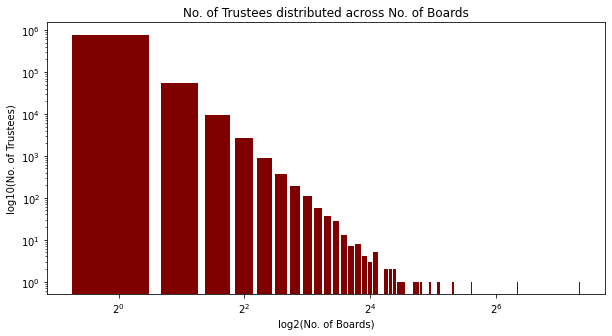

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# Dictionary d1 => {no. of boards : no. of trustees}

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(d1.keys(), d1.values(), color ='maroon')
# plt.scatter(d1.keys(), d1.values())
# plt.plot(list(d1.keys()),list(d1.values()),color="red")

# plt.yscale("log")
plt.loglog(basex=2,basey=10) # using log scale since the numbers are huge
plt.xlabel("log2(No. of Boards)")
plt.ylabel("log10(No. of Trustees)")
plt.title("No. of Trustees distributed across No. of Boards")
plt.show()


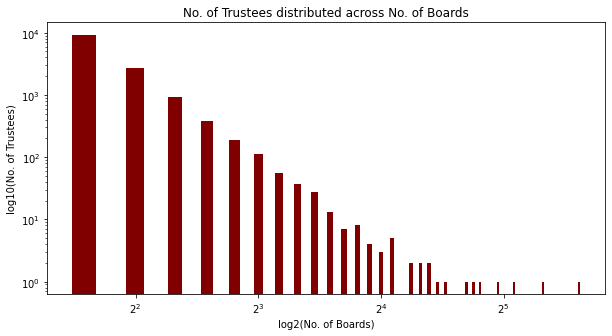

In [26]:

# to see a zoomed in image of the distribution, removing people who only sit on 1,2,81,161 boards

d11 = d1.copy()
d11.pop(1)
d11.pop(2)
d11.pop(81)
d11.pop(161)


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(d11.keys(), d11.values(), color ='maroon',
        width = 0.4)
plt.loglog(basex=2,basey=10)
plt.xlabel("log2(No. of Boards)")
plt.ylabel("log10(No. of Trustees)")
plt.title("No. of Trustees distributed across No. of Boards")
plt.savefig('trustees_over_boards.png')
plt.show()

In [27]:
# Now that we have visualized number of trustees distributed across no. of boards, lets try to visualize the opposite
# how many trustees sit on x no. of boards?

# d2 => {no. of trustees : no. of boards}
d2 = {}
# x1 will contain unique organisation ids
x1 = []
# y1 will contain the no. of trustees in that org
y1 = []

# iterate over all the organisations
for i in orgs.keys():
    x1.append(i)
    y1.append(len(orgs[i]))
    if(len(orgs[i]) not in d2):
        d2[len(orgs[i])] = 1
    else:
        d2[len(orgs[i])]+= 1

print(len(x1))
print(len(y1))
print(len(d2))

170190
170190
91


In [28]:
# sorting the values to produce better visualisation
d22 = {}
for k in sorted(d2):
    d22[k] = d2[k]
d22
# {no. of trustees : no. of boards}

{1: 9560,
 2: 14498,
 3: 34703,
 4: 25695,
 5: 20836,
 6: 15638,
 7: 12501,
 8: 9506,
 9: 7457,
 10: 5271,
 11: 3876,
 12: 2928,
 13: 1837,
 14: 1378,
 15: 980,
 16: 687,
 17: 507,
 18: 450,
 19: 370,
 20: 286,
 21: 207,
 22: 142,
 23: 114,
 24: 74,
 25: 79,
 26: 67,
 27: 56,
 28: 37,
 29: 31,
 30: 33,
 31: 26,
 32: 17,
 33: 16,
 34: 20,
 35: 11,
 36: 15,
 37: 12,
 38: 11,
 39: 15,
 40: 13,
 41: 11,
 42: 7,
 43: 9,
 44: 13,
 45: 7,
 46: 12,
 47: 4,
 48: 10,
 49: 8,
 50: 6,
 51: 6,
 52: 6,
 53: 7,
 54: 13,
 55: 5,
 56: 4,
 57: 6,
 58: 3,
 59: 10,
 60: 2,
 61: 4,
 62: 6,
 63: 2,
 64: 3,
 65: 5,
 66: 5,
 67: 4,
 68: 4,
 69: 7,
 70: 2,
 72: 3,
 73: 3,
 74: 2,
 75: 2,
 77: 2,
 78: 2,
 79: 2,
 80: 4,
 82: 1,
 83: 2,
 85: 1,
 88: 3,
 92: 2,
 93: 1,
 97: 2,
 100: 1,
 118: 1,
 120: 2,
 123: 1,
 130: 1,
 287: 1}

In [ ]:
# boards_df1 = pd.DataFrame({'num_people': list(d22.keys()), 
#                            'num_boards': list(d22.values())})
# boards_df1.to_csv('/content/drive/My Drive/UK_Data/file1.csv',index=False)

In [29]:
sum(d22.values()) #=> is equal to the total number of organizations

170190

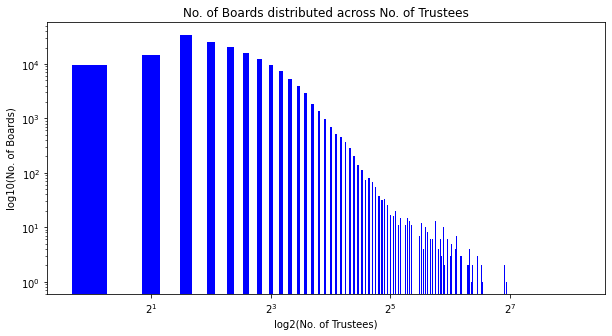

In [30]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(d22.keys(), d22.values(), color ='blue',
        width = 0.4)
plt.loglog(basex=2,basey=10)
plt.xlabel("log2(No. of Trustees)")
plt.ylabel("log10(No. of Boards)")
plt.title("No. of Boards distributed across No. of Trustees")
plt.savefig('boards_over_trustees.png')
plt.show()


# Creating Board Networks

- We are using networkx for building the network.
- src - https://networkx.org/?msclkid=2ece9889cf8c11ecb8808f7e718ca130

In [31]:
!pip install networkx

In [40]:
import networkx as nx
G = nx.MultiGraph() # a multigraph can have multiple edges between 2 nodes


In [41]:
# we want to visualize how the network of overlapping trustees looks like
# total organizations = 170190
# Node in the graph => an Organization
#nodes are sized by number of trustees in the organization
from itertools import combinations
sizes = []
ctr=0 # creating this counter to limit the number of nodes since it will take a lot of time to render a network with 170190 nodes and we might not see important overlap
G.clear() # its important to erase all existing data before running this chunk of code again otherwise some values may overlap
for i in orgs:
    G.add_node(i)
    #adding name of the charities
    #G.add_node(i,{"name":charity[i]["charity_name"]})
    sizes.append(len(orgs[i])) # each element in the sizes list will correspond to the number of trustees in the node i (taken from orgs)
    ctr+=1
    if(ctr==1000): # limiting the number of nodes to 1000
        break
    

    


In [42]:
print(len(sizes))
print(G.number_of_nodes())

1000
1000


In [45]:
# create a list of all the trustees sitting on the above 1000 boards
mem2 = []
for i in list(G.nodes):
  for t in orgs[i]:
    mem2.append(t['trustee_id'])

print(len(mem2))
   

2267


There are 2267 board members and 1000 boards, it means there is some sort of overlap.

In [50]:
# now that we have added 1000 nodes to the network, we need to add the edges
# a connection/edge between 2 nodes denotes that they have a common trustee
boards = list(G.nodes) # list of 1000 orgs in the network, nodes are identified by org id
for p in mem2:
    my_list = members[p] # list of all boards p sits on
    res = [ ] 
    # add all common organisation numbers to the list
    # there is a possibility that an organisation in the above "my_list" list is not present as a node in the above network since we only added first 1000 orgs
    # therefore ignore those orgs that are not in the network for now
    for sub in my_list:
      if sub['organisation_number'] in boards:
        res.append(sub['organisation_number'])

    overlap = list(combinations(res,2)) # the overlap is simply an edge from one of these orgs to another
    G.add_edges_from(overlap) # add edges to the network from the above org pairs
    # whever a trustee sits on 2 different boards, we are adding an edge between the corresponding nodes to depict overlap
    

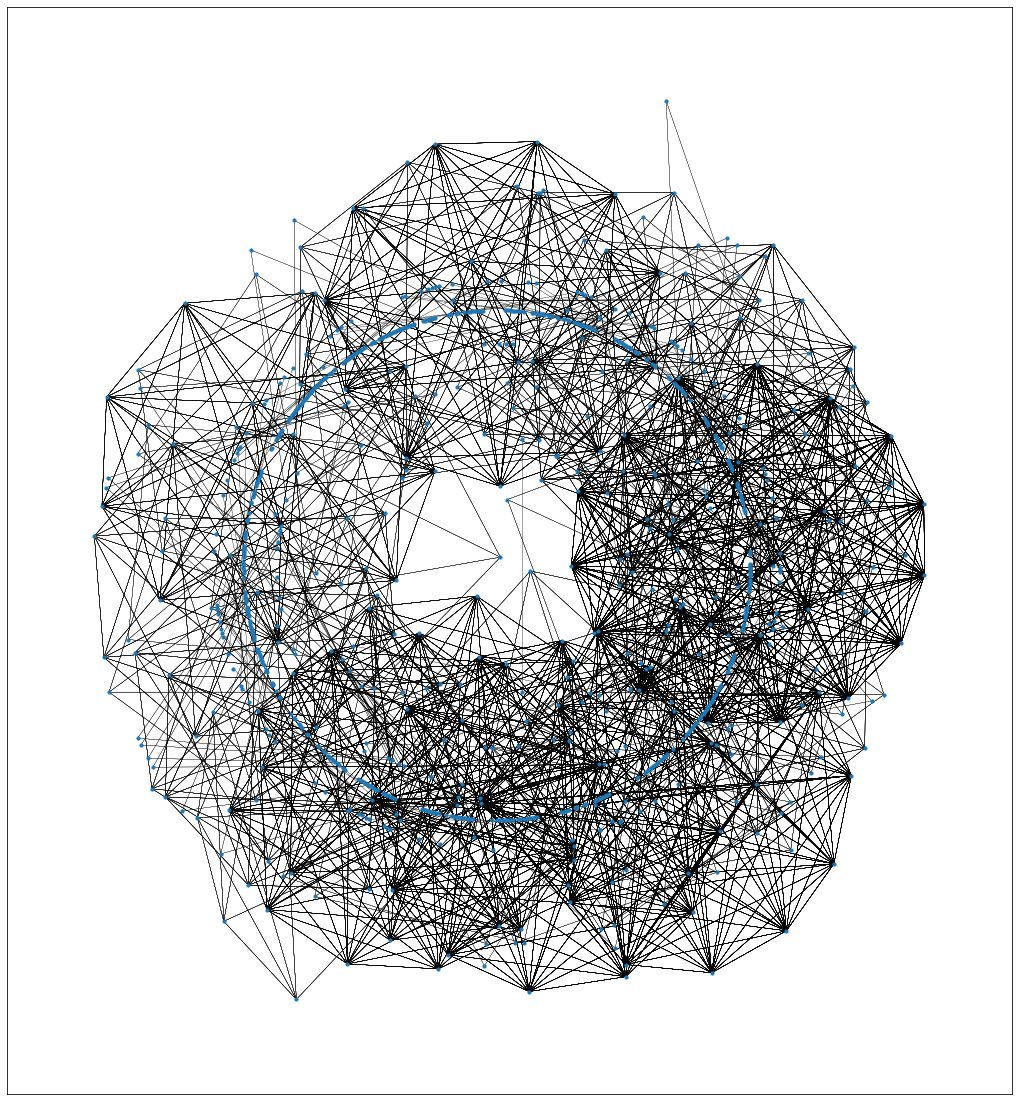

In [52]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 20]
pos = nx.kamada_kawai_layout(G)
plt.plot()
fig=plt.gcf()
# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=10)#, labels=charity,with_labels=True,node_size = [100,200,300,1000])
#curved edges dont work in non directed graph
nx.draw_networkx_edges(
    G, pos,
    connectionstyle="arc3,rad=0.1" ,
    width=0.2
)
# nx.draw_networkx_labels(
#     G,pos,labels=charity
# )
plt.savefig("path.png",figsize=(50,50),dpi=1000)
plt.show()

Above image is very clustered since we have 1000 different organisations and multiple edges between the nodes but it does give some basic idea of overlap between the organisations.

We need some way of filtering out chartiies (by revenue, type etc.) so that a better network can be formed.

Next steps:
- explore revenue
- explore charity categories - arts and science category etc.
- need to filter out the charities
- filter using assets/revenue
- arts and culture - 42000 orgs
- filter down to 1000 nodes
- filter by latest_income from charity table
- try to reach top 100 in arts/culture/charity/heritage/science
- Use Gephi for building networks


https://lsheks.github.io/images/art-museum-board-members.png -  this is the type of image we are trying to reach


In [74]:
# reading data as pandas dataframe so that further processing is fast and easy
charity_classification = pd.read_csv("drive/My Drive/UK_Data/text/publicextract.charity_classification.txt",sep="\t")
print(len(charity_classification))
%load_ext google.colab.data_table
charity_classification.head()

1602240
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,classification_code,classification_type,classification_description
0,2022-01-11 00:00:00.0000000,200001,200001,0,101,What,General Charitable Purposes
1,2022-01-11 00:00:00.0000000,200001,200001,0,102,What,Education/training
2,2022-01-11 00:00:00.0000000,200001,200001,0,109,What,Arts/culture/heritage/science
3,2022-01-11 00:00:00.0000000,200001,200001,0,112,What,Environment/conservation/heritage
4,2022-01-11 00:00:00.0000000,200001,200001,0,201,Who,Children/young People


In [75]:
from collections import Counter
Counter(charity_classification['classification_description']) # display various types of categories charities are classified into

Counter({'Accommodation/housing': 12403,
         'Acts As An Umbrella Or Resource Body': 22142,
         'Amateur Sport': 38753,
         'Animals': 5927,
         'Armed Forces/emergency Service Efficiency': 1280,
         'Arts/culture/heritage/science': 42296,
         'Children/young People': 137840,
         'Disability': 37201,
         'Economic/community Development/employment': 32546,
         'Education/training': 127657,
         'Elderly/old People': 71150,
         'Environment/conservation/heritage': 26619,
         'General Charitable Purposes': 79955,
         'Human Rights/religious Or Racial Harmony/equality Or Diversity': 7261,
         'Makes Grants To Individuals': 50204,
         'Makes Grants To Organisations': 69375,
         'Other Charitable Activities': 32804,
         'Other Charitable Purposes': 16954,
         'Other Charities Or Voluntary Bodies': 57079,
         'Other Defined Groups': 41642,
         'Overseas Aid/famine Relief': 15070,
         'Peopl

Note that above classification might not be very accurate since a single charity is classified into multiple categories. It should be taken into account whenevre doing further processing.

In [76]:
# Focusing on charities belonging to the Arts/culture/heritage/science category
filtered = charity_classification[charity_classification['classification_description'] == 'Arts/culture/heritage/science']
print(filtered.shape)
filtered.head(10)

(42296, 7)


,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,classification_code,classification_type,classification_description
2,2022-01-11 00:00:00.0000000,200001,200001,0,109,What,Arts/culture/heritage/science
47,2022-01-11 00:00:00.0000000,200024,200024,0,109,What,Arts/culture/heritage/science
79,2022-01-11 00:00:00.0000000,200036,200036,0,109,What,Arts/culture/heritage/science
109,2022-01-11 00:00:00.0000000,200048,200048,0,109,What,Arts/culture/heritage/science
125,2022-01-11 00:00:00.0000000,200051,200051,0,109,What,Arts/culture/heritage/science
263,2022-01-11 00:00:00.0000000,200083,200083,0,109,What,Arts/culture/heritage/science
270,2022-01-11 00:00:00.0000000,200084,200084,0,109,What,Arts/culture/heritage/science
325,2022-01-11 00:00:00.0000000,200103,200103,0,109,What,Arts/culture/heritage/science
339,2022-01-11 00:00:00.0000000,200104,200104,0,109,What,Arts/culture/heritage/science
403,2022-01-11 00:00:00.0000000,200127,200127,0,109,What,Arts/culture/heritage/science


In [77]:
# read in the tax return data
annual_return = pd.read_csv("drive/My Drive/UK_Data/text/publicextract.charity_annual_return_history.txt",sep="\t")
print(annual_return.shape)
annual_return.head(5)

(1133112, 14)


,date_of_extract,organisation_number,registered_charity_number,fin_period_start_date,fin_period_end_date,ar_cycle_reference,reporting_due_date,date_annual_return_received,date_accounts_received,total_gross_income,total_gross_expenditure,accounts_qualified,suppression_ind,suppression_type
0,2022-01-11 00:00:00.0000000,200001,200001,2008-10-01 00:00:00.0000000,2009-09-30 00:00:00.0000000,AR09,2010-07-30 00:00:00.0000000,2010-07-30 00:00:00.0000000,2010-07-30 00:00:00.0000000,35270.0,35692.0,NaN,False,NaN
1,2022-01-11 00:00:00.0000000,200001,200001,2009-10-01 00:00:00.0000000,2010-09-30 00:00:00.0000000,AR10,2011-07-30 00:00:00.0000000,2011-08-02 00:00:00.0000000,2011-08-02 00:00:00.0000000,84000.0,71849.0,NaN,False,NaN
2,2022-01-11 00:00:00.0000000,200001,200001,2010-10-01 00:00:00.0000000,2011-09-30 00:00:00.0000000,AR11,2012-07-30 00:00:00.0000000,NaN,NaN,NaN,NaN,NaN,False,NaN
3,2022-01-11 00:00:00.0000000,200001,200001,2011-10-01 00:00:00.0000000,2012-09-30 00:00:00.0000000,AR12,2013-07-30 00:00:00.0000000,NaN,NaN,NaN,NaN,NaN,False,NaN
4,2022-01-11 00:00:00.0000000,200001,200001,2012-10-01 00:00:00.0000000,2013-09-30 00:00:00.0000000,AR13,2014-07-30 00:00:00.0000000,NaN,NaN,NaN,NaN,NaN,False,NaN


In [78]:
# we have annual returns startgin from 2008 till 2020 for a single charity
# focus on the latest annual return i.e. tax rturns filed last year -> annual returns for 2021
annual_return_2021 = annual_return[annual_return['fin_period_start_date'] >= '2020']
print(annual_return_2021.shape)
annual_return_2021.head(5)

(85755, 14)


,date_of_extract,organisation_number,registered_charity_number,fin_period_start_date,fin_period_end_date,ar_cycle_reference,reporting_due_date,date_annual_return_received,date_accounts_received,total_gross_income,total_gross_expenditure,accounts_qualified,suppression_ind,suppression_type
24,2022-01-11 00:00:00.0000000,200009,200009,2020-04-06 00:00:00.0000000,2021-04-05 00:00:00.0000000,AR21,2022-02-05 00:00:00.0000000,2021-12-23 00:00:00.0000000,2021-12-23 00:00:00.0000000,273310.0,396307.0,NaN,False,NaN
34,2022-01-11 00:00:00.0000000,200012,200012,2020-04-01 00:00:00.0000000,2021-03-31 00:00:00.0000000,AR21,2022-01-31 00:00:00.0000000,2021-08-30 00:00:00.0000000,NaN,3646.0,3646.0,NaN,False,NaN
45,2022-01-11 00:00:00.0000000,200017,200017,2020-04-01 00:00:00.0000000,2021-03-31 00:00:00.0000000,AR21,2022-01-31 00:00:00.0000000,2021-12-24 00:00:00.0000000,NaN,21079.0,1646.0,NaN,False,NaN
50,2022-01-11 00:00:00.0000000,200023,200023,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-09-28 00:00:00.0000000,NaN,0.0,0.0,NaN,False,NaN
55,2022-01-11 00:00:00.0000000,200024,200024,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-02-09 00:00:00.0000000,NaN,208.0,0.0,NaN,False,NaN


In [79]:
# merging the charity classification table with the annual return history table
merged = filtered.merge(annual_return_2021, on='organisation_number', how='left')
print(merged.shape)
merged.head(5)

(42342, 20)


,date_of_extract_x,organisation_number,registered_charity_number_x,linked_charity_number,classification_code,classification_type,classification_description,date_of_extract_y,registered_charity_number_y,fin_period_start_date,fin_period_end_date,ar_cycle_reference,reporting_due_date,date_annual_return_received,date_accounts_received,total_gross_income,total_gross_expenditure,accounts_qualified,suppression_ind,suppression_type
0,2022-01-11 00:00:00.0000000,200001,200001,0,109,What,Arts/culture/heritage/science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-11 00:00:00.0000000,200024,200024,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,200024.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-02-09 00:00:00.0000000,NaN,208.0,0.0,NaN,False,NaN
2,2022-01-11 00:00:00.0000000,200036,200036,0,109,What,Arts/culture/heritage/science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-11 00:00:00.0000000,200048,200048,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,200048.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-10-21 00:00:00.0000000,2021-10-21 00:00:00.0000000,1126275.0,1465425.0,NaN,False,NaN
4,2022-01-11 00:00:00.0000000,200051,200051,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,200051.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-05-21 00:00:00.0000000,2021-05-21 00:00:00.0000000,4790000.0,59827000.0,NaN,False,NaN


In [80]:
merged['total_gross_income'].isna().sum()

28232

In [81]:
#Dropping the rows where there is no annual gross income details for the year 2020-2021
merged = merged.dropna(subset=['total_gross_income'])
merged.reset_index(drop=True, inplace=True)
print(merged.shape)

(14110, 20)


In [82]:
merged.head()

,date_of_extract_x,organisation_number,registered_charity_number_x,linked_charity_number,classification_code,classification_type,classification_description,date_of_extract_y,registered_charity_number_y,fin_period_start_date,fin_period_end_date,ar_cycle_reference,reporting_due_date,date_annual_return_received,date_accounts_received,total_gross_income,total_gross_expenditure,accounts_qualified,suppression_ind,suppression_type
0,2022-01-11 00:00:00.0000000,200024,200024,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,200024.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-02-09 00:00:00.0000000,NaN,208.0,0.0,NaN,False,NaN
1,2022-01-11 00:00:00.0000000,200048,200048,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,200048.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-10-21 00:00:00.0000000,2021-10-21 00:00:00.0000000,1126275.0,1465425.0,NaN,False,NaN
2,2022-01-11 00:00:00.0000000,200051,200051,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,200051.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-05-21 00:00:00.0000000,2021-05-21 00:00:00.0000000,4790000.0,59827000.0,NaN,False,NaN
3,2022-01-11 00:00:00.0000000,200084,200084,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,200084.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-09-21 00:00:00.0000000,NaN,3906.0,6186.0,NaN,False,NaN
4,2022-01-11 00:00:00.0000000,200103,200103,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,200103.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-07-29 00:00:00.0000000,2021-07-29 00:00:00.0000000,721502.0,806257.0,NaN,False,NaN


In [83]:
Counter(merged['classification_type'])

Counter({'What': 14110})

In [84]:
# Sorting in descending order of annual expenditure
merged = merged.sort_values(by='total_gross_expenditure', ascending=False)
merged.reset_index(drop=True, inplace=True)
# keeping the first 1000 rows
merged = merged.head(1000)
merged.head()

,date_of_extract_x,organisation_number,registered_charity_number_x,linked_charity_number,classification_code,classification_type,classification_description,date_of_extract_y,registered_charity_number_y,fin_period_start_date,fin_period_end_date,ar_cycle_reference,reporting_due_date,date_annual_return_received,date_accounts_received,total_gross_income,total_gross_expenditure,accounts_qualified,suppression_ind,suppression_type
0,2022-01-11 00:00:00.0000000,1036733,1036733,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,1036733.0,2020-04-01 00:00:00.0000000,2021-03-31 00:00:00.0000000,AR21,2022-01-31 00:00:00.0000000,2021-12-24 00:00:00.0000000,2021-12-24 00:00:00.0000000,1.488506e+09,1.419616e+09,NaN,False,NaN
1,2022-01-11 00:00:00.0000000,5027494,1146792,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,1146792.0,2020-04-01 00:00:00.0000000,2021-03-31 00:00:00.0000000,AR21,2022-01-31 00:00:00.0000000,2021-12-13 00:00:00.0000000,2021-12-13 00:00:00.0000000,2.154000e+08,2.213000e+08,NaN,False,NaN
2,2022-01-11 00:00:00.0000000,5015703,1140062,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,1140062.0,2020-04-01 00:00:00.0000000,2021-03-31 00:00:00.0000000,AR21,2022-01-31 00:00:00.0000000,2021-12-09 00:00:00.0000000,2021-12-09 00:00:00.0000000,1.749402e+08,1.880009e+08,NaN,False,NaN
3,2022-01-11 00:00:00.0000000,209603,209603,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,209603.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-09-10 00:00:00.0000000,2021-09-10 00:00:00.0000000,1.991710e+08,1.725490e+08,NaN,False,NaN
4,2022-01-11 00:00:00.0000000,3993320,1094130,0,109,What,Arts/culture/heritage/science,2022-01-11 00:00:00.0000000,1094130.0,2020-01-01 00:00:00.0000000,2020-12-31 00:00:00.0000000,AR20,2021-10-31 00:00:00.0000000,2021-10-11 00:00:00.0000000,2021-10-11 00:00:00.0000000,6.764948e+06,9.170931e+07,NaN,False,NaN


In [85]:
merged.columns

Index(['date_of_extract_x', 'organisation_number',
       'registered_charity_number_x', 'linked_charity_number',
       'classification_code', 'classification_type',
       'classification_description', 'date_of_extract_y',
       'registered_charity_number_y', 'fin_period_start_date',
       'fin_period_end_date', 'ar_cycle_reference', 'reporting_due_date',
       'date_annual_return_received', 'date_accounts_received',
       'total_gross_income', 'total_gross_expenditure', 'accounts_qualified',
       'suppression_ind', 'suppression_type'],
      dtype='object')

In [86]:
merged = merged.drop(columns=['registered_charity_number_y'])
merged = merged.rename({'registered_charity_number_x': 'registered_charity_number'}, axis=1)
merged.columns

Index(['date_of_extract_x', 'organisation_number', 'registered_charity_number',
       'linked_charity_number', 'classification_code', 'classification_type',
       'classification_description', 'date_of_extract_y',
       'fin_period_start_date', 'fin_period_end_date', 'ar_cycle_reference',
       'reporting_due_date', 'date_annual_return_received',
       'date_accounts_received', 'total_gross_income',
       'total_gross_expenditure', 'accounts_qualified', 'suppression_ind',
       'suppression_type'],
      dtype='object')

In [98]:
#keeping useful columns
final = merged[['organisation_number', 'registered_charity_number', 'total_gross_income','total_gross_expenditure']]
final.head()

,organisation_number,registered_charity_number,total_gross_income,total_gross_expenditure
0,1036733,1036733,1.488506e+09,1.419616e+09
1,5027494,1146792,2.154000e+08,2.213000e+08
2,5015703,1140062,1.749402e+08,1.880009e+08
3,209603,209603,1.991710e+08,1.725490e+08
4,3993320,1094130,6.764948e+06,9.170931e+07


In [99]:
# we need to filter out boards with only one trustee since they won't cause any overlap, not useful for the network image
n_trustee = []
names= []
for index, row in final.iterrows():
  try:
    n_trustee.append(len(orgs[int(row['organisation_number'])]))
    names.append(charity[int(row['organisation_number'])])
  except:
    n_trustee.append(0)
    names.append("NA")
    continue
len(n_trustee)

1000

In [100]:
final['n_trustee'] = n_trustee
final['organisation_name'] = names
final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,organisation_number,registered_charity_number,total_gross_income,total_gross_expenditure,n_trustee,organisation_name
0,1036733,1036733,1.488506e+09,1.419616e+09,12,THE ARTS COUNCIL OF ENGLAND
1,5027494,1146792,2.154000e+08,2.213000e+08,10,CANAL & RIVER TRUST
2,5015703,1140062,1.749402e+08,1.880009e+08,12,THE FRANCIS CRICK INSTITUTE LIMITED
3,209603,209603,1.991710e+08,1.725490e+08,14,THE ROYAL NATIONAL LIFEBOAT INSTITUTION
4,3993320,1094130,6.764948e+06,9.170931e+07,7,REUBEN FOUNDATION


In [96]:
# filtering out top 50 boards with less than 2 trustees
final_filtered = final[final['n_trustee'] > 2]
final_filtered=final_filtered.head(50)

In [113]:
# Build network of the top 50 boards
# Both org and trustee as nodes and add edges between them
import networkx as nx
G = nx.MultiGraph()
G.clear()
# sizes = []
color_map = {} # for storing the color of the node, org - red, trustee - blue
label_map = {} # for storing name of the trustee or organisation

multi = 0

for index, row in final_filtered.iterrows():
    G.add_node(int(row['organisation_number']))
    # sizes.append(row['total_gross_expenditure'])
    color_map[int(row['organisation_number'])]='red'
    label_map[int(row['organisation_number'])]=charity[int(row['organisation_number'])]
    try:
      for mem in orgs[int(row['organisation_number'])]:
        if(mem['trustee_id'] not in list(G.nodes)):
          G.add_node(int(mem['trustee_id']))
          color_map[mem['trustee_id']]='blue'
          label_map[mem['trustee_id']]= mem['trustee_name']
        else:
          # if the trustee is already present in the organisation then it means that it sits on more than 1 board
          multi+=1
    except:
      continue
print(len(color_map))
print(len(label_map))
print(G.number_of_nodes())
print(multi)


577
577
577
2


Not an ideal sitution for us since there is extremely less overlap in the top 50 boards in the arts category. Only 2 trustees seem to be sitting on more than 1 board. It is possible that trustees overlap with boards not preent in top 50 boards but our initial hypothesis that top 50 boards might have a lot of common trustees is wrong.

In [114]:
G.nodes(0)


NodeDataView({1036733: None, 2088380: None, 2100489: None, 12111566: None, 11311484: None, 3267497: None, 2363026: None, 11148565: None, 11451361: None, 12268622: None, 11865280: None, 12268638: None, 2565102: None, 5027494: None, 11654382: None, 2732322: None, 11894433: None, 11940169: None, 3337067: None, 11946093: None, 1638036: None, 11206310: None, 12237271: None, 11324574: None, 5015703: None, 11232814: None, 11771155: None, 3163103: None, 2239280: None, 12205507: None, 11457262: None, 12212391: None, 12251195: None, 12279857: None, 12401483: None, 11230420: None, 11918954: None, 209603: None, 3454925: None, 11474089: None, 11519753: None, 11740315: None, 11844985: None, 2700658: None, 11953968: None, 12138439: None, 12190897: None, 12343846: None, 12490720: None, 12490756: None, 12490774: None, 12547374: None, 3993320: None, 3663240: None, 3495364: None, 3663238: None, 2436329: None, 3663239: None, 12336481: None, 2435817: None, 1034245: None, 3356916: None, 11949221: None, 1194

In [115]:
# add edges to the network, link trustees to organisations
for p in members:
  if(p in G.nodes(0)):
    boards = []
    for j in members[p]:
      if(j['organisation_number'] in G.nodes()):
        boards.append(j['organisation_number'])

    res = [ (p,sub) for sub in boards ]
    if len(res)>1:
      print(res)
    G.add_edges_from(res)

[(11173245, 5012258), (11173245, 5076288)]
[(11311484, 1036733), (11311484, 216726)]


In [116]:
d = dict(nx.degree(G)) # gives the degree of each node in the network

sizes={} # store the size for every node
ind = 0
for i in d:
  if(color_map[i]=="blue"): # if it is a trustee node then size it according to the degree - number of edges
    sizes[i] = d[i]
  else: # if it is a org node then multiply the degree size by 100
    sizes[i] = d[i]*100
  ind+=1
print(len(sizes))

577


In [117]:
# setting node attributes for the network
nx.set_node_attributes(G, color_map, name="color")
nx.set_node_attributes(G, label_map, name="labels")
nx.set_node_attributes(G, sizes, name="sizes")

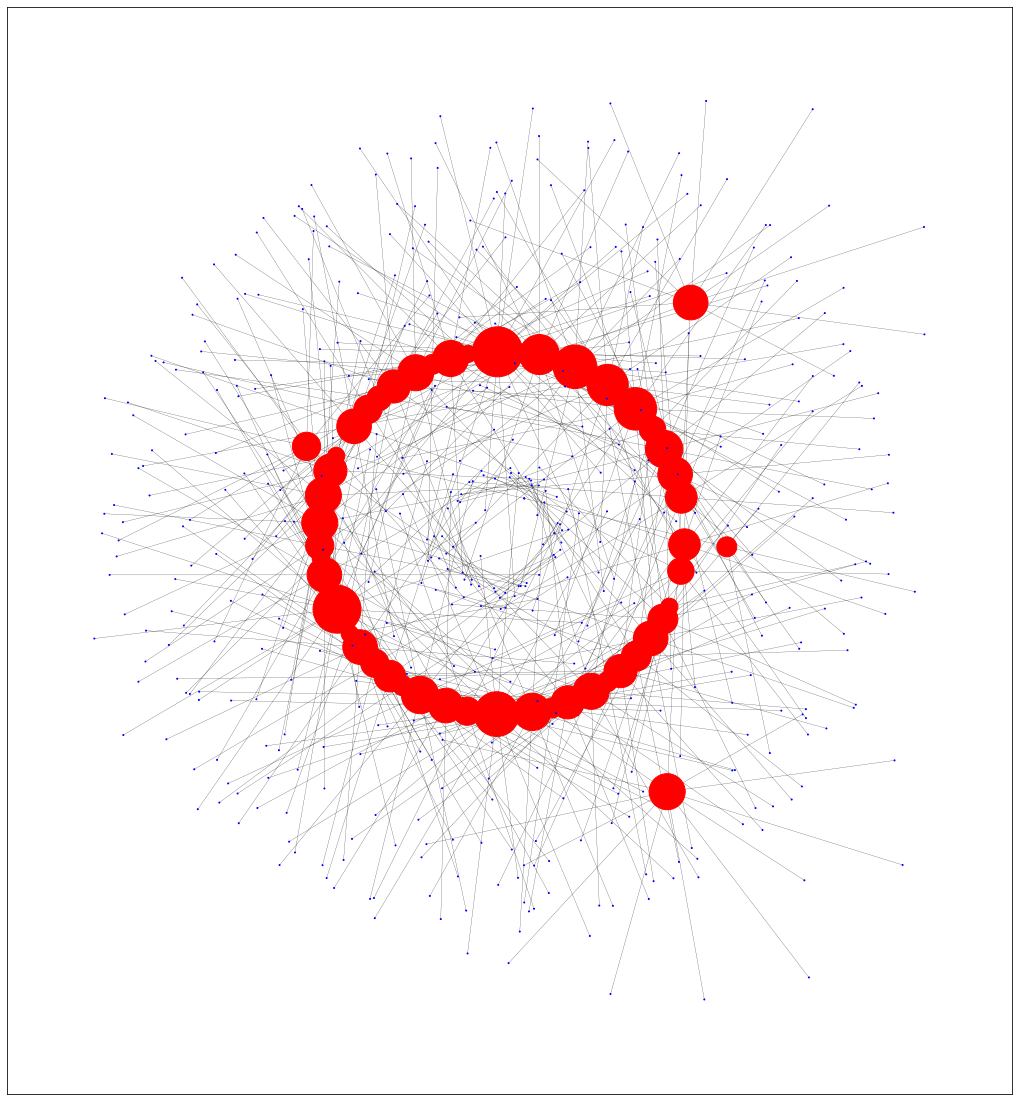

In [123]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 20]
pos = nx.kamada_kawai_layout(G)
plt.plot()
fig=plt.gcf()
# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=list(sizes.values()), node_color=list(color_map.values()))#, labels=charity,with_labels=True,node_size = [100,200,300,1000])
#curved edges dont work in non directed graph
nx.draw_networkx_edges(
    G, pos,
    connectionstyle="arc3,rad=0.1" ,
    width=0.2
)
# nx.draw_networkx_labels(
#     G,pos,labels=charity
# )
# plt.savefig("path.png",figsize=(50,50),dpi=1000)
plt.show()

Above network does not really make much sense since its mostly individual nodes connected with their trustees.

In [ ]:
#giant component - most of the nodes in the network are connected - a finite portion of the whole network
# we might want to restrict to giant component to visualize a much clearer image of thr network
'''
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
'''

# below snippet of code can be used to save the graph data in the form of gexf file
# gexf files can be directly imported in Gephi and networks can be built easily
'''
nx.write_gexf(G0, "giant.gexf",version='1.2draft')
'''

- Selecting top organisations in a aprticular category or ordering them by expenditure did not help much in creating a network with good overlap.

- Now we will try to approach it differently by doing individual case studies for specific well known organisations.

- To do this we will use BFS and try building a network by starting from an initial node and then recursively adding connected nodes to it.

- Refer to the next Notebook for building networks using BFS.

